# Chapter 2. Preliminaries
## Data Manipulation in pytorch
- 직관적인 Elementwise operation 제공. +,-,* ...
- Broadcasting Mechanism
  > 크기 심지어는 Shape이 다른 Tensor라 할지라도 Element를 Copy하여 동일한 Shape로 변환한 후에 Elementwise operation을 수행함. 
  - 일반적으로 특정 (더 작은) Tensor의 크기가 1인 축을 증가 시키는 방식으로 사용

## Memory 관리 
- lvalue assignment (ex. Y = Y + X) 시 Y가 기존에 가리키던 Tensor가 아닌 새롭게 할당된 Tensor를 가리키게됨. 
- 이는 python이 먼저 memory를 할당하면서 rvalue evaluation 하기 때문.
- 이로인해
  - 성능의 열화
  - 예상치 못한 오류의 가능성 (이전 memory영역에 대한 참조 등...)
- 해결 (추가 적인 Allocation 방지)
  - Y[:] = X + Y 
  - Y += X

## Data Preprocessing
- Pandas Dataframe
  - fillna() : NaN 값을 채워줌
  - get_dummies() : Non-Numerical type value에 대해서 Categorical Column을 생성해줌
    > 예: Name = [David, Jane, Nan, Nan....] => Name_David , Name_Jane, Name_NaN ...

## Linear Algebra
- Reduction 
  - Tensor => Scalar로 변환 
    > 예: sum()
  - Non-Reduction Sum의 경우 Dimension을 유지하고 Sum을 수행 
    > 예: sum(axis=1, keepdims=True) 
- Norms
  - Tensor의 Magnitude 개념 
  - Lp norm = L1, L2 ....
    - L1/ L2 norm을 별도로 구분할 필요 없이 generalized form 존재 
  - Frobenius norm은 L2 norm의 matrix version 

## Calculus 
- neural network : function of multiple variables 
- gradient를 구하는 것은 결국 각각의 variable에 대한 편미분을 모두 구하는 것 
- chain rule : 하나의 함수가 여러 함수의 조합에의해 구성될 때 각 함수에 대한 미분을 구함으로써 전체 미분을 구할 수 있음 

## Automatic Differentiatoin 
- Pytorch 등 framework에서 연산 과정 중에 연산 graph를 추적하여 Automatic Differentiation 수행
- require_grad_() / detach() 함수를 사용하여 gradient 계산에 포함 혹은 배제를 제어할 수 있음

## Probability 
### Joint probability
- P(A,B) => A와 B가 함께 참일 확률

### Conditional Probability 
- P(A|B) => Given B에 대한 A의 확률 
- 정의에 의해 P(A,B) = P(A|B) * P(B) = P(B|A) * P(B) 

### Bayes' theorem 
- 위 등식에 의하여 우리는 하나의 Conditional Probability로 부터 다른 하나 (역순서의) Conditional Probability를 얻을 수 있음
- 만약 두가지 Conditional probability 중 하나가 이미 알려져 있거나 구하기 매우 쉽다면 이에 비해 상대적으로 구하기 어려운 다른 하나를 알 수 있음.

### Indenpendence
 - P(A | B) = P(A) 일 때 A와 B는 서로 독립적 즉, orthogonal 하다고 함.


  


In [1]:
import torch

x = torch.arange(12, dtype=torch.float32)
print("number of element of torch tensor x : {}".format(x.numel())) # number of elements
print("size of torch tensor x : {}".format(x.shape))
X = x.reshape(3,4)
X

number of element of torch tensor x : 12
size of torch tensor x : torch.Size([12])


tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [2]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [3]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])

# elementwise arithmetic operations
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [4]:
# exp is performed elementwise
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [5]:
X = torch.arange(12, dtype=torch.float32).reshape(3,4)
Y = torch.tensor([[1,2,3,4],[2,3,4,5],[3,4,5,6]],dtype=torch.float32)
# concatenate tensor with different dimension
torch.cat((X,Y), dim=0), torch.cat((X,Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 1.,  2.,  3.,  4.],
         [ 2.,  3.,  4.,  5.],
         [ 3.,  4.,  5.,  6.]]),
 tensor([[ 0.,  1.,  2.,  3.,  1.,  2.,  3.,  4.],
         [ 4.,  5.,  6.,  7.,  2.,  3.,  4.,  5.],
         [ 8.,  9., 10., 11.,  3.,  4.,  5.,  6.]]))

In [6]:
# binary tensor from elementwise logic operation
X == Y

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [7]:
x.sum()

tensor(15.)

In [8]:
before = id(Y)
# 변수에 값을 새롭게 대입하는 것을 python에서는 새롭게 메모리를 할당하게된다. 
# 이는 불필요한 memory allocator 동작을 수반하게 되어 성능이 저하
# 이존 영역의 메모리를 참조하는 등 오류를 유발 할 수 있다. 
# 이를 피하기 위해서 아래와 같은 방법으로 이를 우회할 수 있다. 
Y += X
Y[:] = Y + X
id(Y) == before

True

In [9]:
import numpy
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [10]:
import os
import pandas as pd

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # Column names
    f.write('NA,Pave,127500\n')  # Each row represents a data example
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [11]:
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [12]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:,2]
inputs = inputs.fillna(inputs.mean())
inputs, outputs

/tmp/ipykernel_1337/951350474.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inputs = inputs.fillna(inputs.mean())


(   NumRooms Alley
 0       3.0  Pave
 1       2.0   NaN
 2       4.0   NaN
 3       3.0   NaN,
 0    127500
 1    106000
 2    178100
 3    140000
 Name: Price, dtype: int64)

In [13]:
!pip show pandas

Name: pandas
Version: 1.4.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /opt/conda/lib/python3.8/site-packages
Requires: python-dateutil, pytz, numpy
Required-by: d2l


In [14]:
inputs = pd.get_dummies(inputs, dummy_na=True)

type(inputs),type(inputs.values), type(outputs.values)

(pandas.core.frame.DataFrame, numpy.ndarray, numpy.ndarray)

In [15]:
# Conversion pandas frame to tensor
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y


(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [16]:
B = torch.tensor([[1,2,3],[2,3,4],[3,4,5]])
B

B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [17]:
A = torch.arange(20, dtype=torch.float32).reshape(5,4)
B = A.clone()
id(B), id(A)
sum_A = A.sum(axis=1,keepdims=True)
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [18]:
A = torch.tensor([1,2,3,4])
A_dot = torch.sum(A * A)

A_dot, A.dot(A)


(tensor(30), tensor(30))

In [19]:
A = torch.arange(20).reshape(5,4)
x = torch.tensor([1,2,3,4])
A, A.mv(x)


(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]),
 tensor([ 20,  60, 100, 140, 180]))

In [20]:
A = torch.arange(20, dtype=torch.float32).reshape(4,5)
A, A.matmul(A.T), A.mm(A.T)

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]]),
 tensor([[  30.,   80.,  130.,  180.],
         [  80.,  255.,  430.,  605.],
         [ 130.,  430.,  730., 1030.],
         [ 180.,  605., 1030., 1455.]]),
 tensor([[  30.,   80.,  130.,  180.],
         [  80.,  255.,  430.,  605.],
         [ 130.,  430.,  730., 1030.],
         [ 180.,  605., 1030., 1455.]]))

In [21]:
# norm : the magnitude of multi dimensional vector 
# L2 norm : square root of sum of square of elements
# L1 norm : sum of absolute value of elements
# Lp norm : generalized form ofr L1,2,3,4, ... n Norm 

A = torch.tensor([[1,2,3,4],[2,3,4,5]], dtype=torch.float32)
torch.norm(A), torch.abs(A).sum()

# Lf norm : Lp norm of matrix or multi dimensional


(tensor(9.1652), tensor(24.))

In [22]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h
h = 0.1
for i in range(5):
    print(f'h = {h:.5f} numerical lim : {numerical_lim(f, 1, h):.5f}')
    h *= 0.1
    
def use_svg_display(): #@save
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)): #@save
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
#@save
def set_axes(axes, xlabels, ylabels, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabels)
    axes.set_ylabel(ylabels)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, 
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-','m--','g-.','r:'), figsize=(3.5,2.5), axes=None):
    if legend is None:
        legend =[]
    
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list) 
                and not hasattr(X[0], "__len__"))
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

h = 0.10000 numerical lim : 2.30000
h = 0.01000 numerical lim : 2.03000
h = 0.00100 numerical lim : 2.00300
h = 0.00010 numerical lim : 2.00030
h = 0.00001 numerical lim : 2.00003


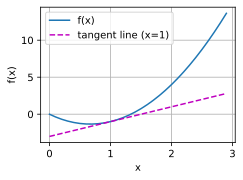

In [23]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'tangent line (x=1)'])

In [24]:
# Autograd Simple
import torch
x = torch.arange(4.0)
x, x.grad


(tensor([0., 1., 2., 3.]), None)

In [25]:
x.requires_grad_(True)
y = 2 * torch.dot(x, x)
y


tensor(28., grad_fn=<MulBackward0>)

In [26]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

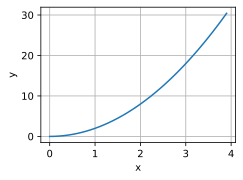

In [27]:
xn = np.arange(4.0,step=0.1)
plot(xn, [2 * xn ** 2], 'x', 'y')

In [28]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l 
fair_probs = torch.ones([6]) / 6
fair_probs
mm = multinomial.Multinomial(1, fair_probs)
mm.sample()

tensor([0., 0., 1., 0., 0., 0.])

In [29]:
# Bayes theorem videa => https://youtu.be/XQoLVl31ZfQ